In [0]:
mport pandas as pd
import numpy as np
from keras.preprocessing import text as keras_text, sequence as keras_seq
from keras.models import Sequential
from keras.layers import LSTM,Dense,TimeDistributed,Activation,MaxPooling2D,Embedding,RepeatVector
from keras.models import Sequential,Model,Input,load_model
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from numpy import array,argmax
from keras.preprocessing.text import Tokenizer
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array,argmax
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data=pd.read_csv("pro and Geo lang.csv")
data=data.dropna()
data=data.drop_duplicates()

In [0]:
data.shape

In [0]:
data.head()

In [0]:
tok = Tokenizer(char_level = False,lower=True)
t=tok.fit_on_texts(data.iloc[:,1])
list_tokenized_train = tok.texts_to_sequences(data.iloc[:,1])
pro_len= keras_seq.pad_sequences(list_tokenized_train, maxlen=350,padding="post") ### pro_lan= protine langauge 

In [0]:
tokenizer = keras_text.Tokenizer(char_level = False,lower=False) #
t=tokenizer.fit_on_texts(data.iloc[:,2])
geo_lan_token= tokenizer.texts_to_sequences(data.iloc[:,2])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(pro_lang,geo_lan_token, test_size=0.3, random_state=42) 
y_train= keras_seq.pad_sequences(y_train, maxlen=10,padding="post")
y_train=to_categorical(y_train)

In [0]:
def define_models(n_input, n_output, n_units):
  encoder_inputs = Input(shape=[n_input])
  layer = e(encoder_inputs)
  Encoder = LSTM(n_units, return_state=False,return_sequences=True)(layer)
  #Encoder=RepeatVector(10)(Encoder)

  
  encoder = LSTM(n_units, return_state=True) 
  
  #en=layer.output_shape
  encoder_outputs, state_h, state_c = encoder(Encoder) 
  
  encoder_states=[state_h,state_c]   ################# states
  
  decoder_inputs = Input(shape=(None, n_output))   
  
  decoder_lstm = LSTM(n_units, return_sequences=False, return_state=True)
  
  decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
  
  #decoder_outputs=Flatten()(decoder_outputs)
  print(decoder_outputs.shape)
  
  decoder_dense = Dense(n_output, activation='softmax')
 
  
  decoder_outputs = decoder_dense(decoder_outputs)
  
  model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
  
  
	# define inference encoder
  encoder_model = Model(encoder_inputs, encoder_states)
  # define inference decoder
  decoder_state_input_h = Input(shape=(n_units,))
  
  decoder_state_input_c = Input(shape=(n_units,))
  
  decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
  
  decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
  
  decoder_states = [state_h, state_c]
  
  decoder_outputs = decoder_dense(decoder_outputs)
  
  decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
  
  from keras.utils.vis_utils import plot_model
  plot_model(model, to_file='model.png', show_shapes=True)

  
	# return all models
  return model, encoder_model, decoder_model
  
  
train, infenc, infdec = define_models(350,932,50)

opt=Adam(0.001)

train.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

train.summary()  
  

(?, 50)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 350)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 350, 100)     1510400     input_26[0][0]                   
__________________________________________________________________________________________________
lstm_24 (LSTM)                  (None, 350, 50)      30200       embedding_1[8][0]                
__________________________________________________________________________________________________
input_27 (InputLayer)           (None, None, 932)    0                                            
__________________________________________________________________________________________________
ls

In [0]:
from keras.utils.vis_utils import plot_model

plot_model(train, to_file='model.png', show_shapes=True)


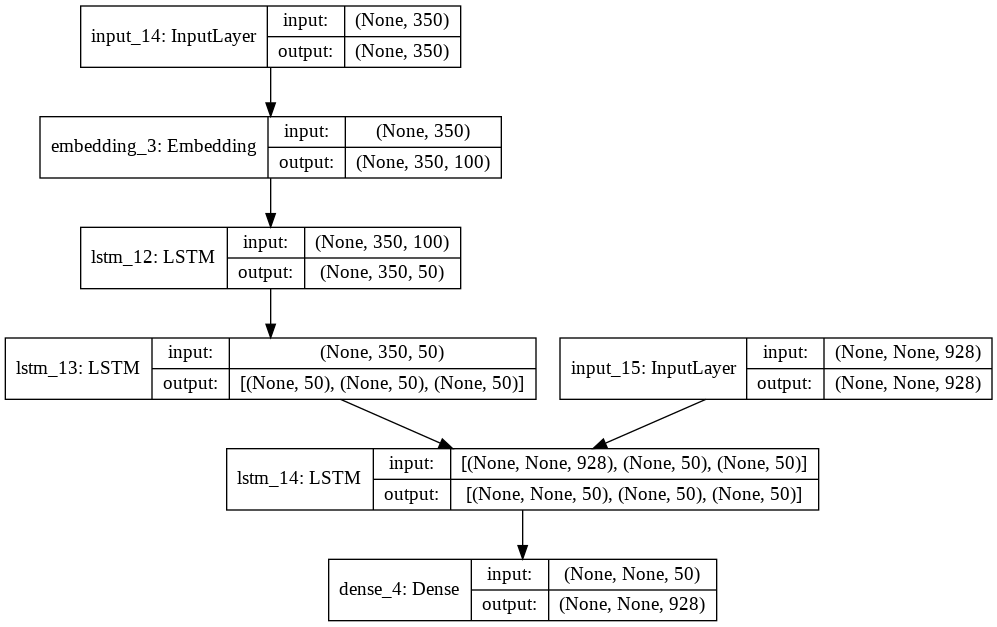

In [0]:
from PIL import Image
Image.open("model.png")

In [0]:
from keras.callbacks import ModelCheckpoint 
filepath="Langauge transalition _model.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor="val_loss" ,verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [0]:
hist=train.fit([X_train,y_train],y,epochs=10,batch_size=64,class_weight="balanced",shuffle=True,validation_split=0.2,callbacks=callbacks_list)  

Train on 29056 samples, validate on 7265 samples
Epoch 1/10
29056/29056 [==============================] - 303s 10ms/step - loss: 170.4270 - acc: 7.2274e-04 - val_loss: 152.5840 - val_acc: 0.0011
Epoch 2/10
29056/29056 [==============================] - 303s 10ms/step - loss: 151.5144 - acc: 8.6041e-04 - val_loss: 141.4920 - val_acc: 0.0011
Epoch 3/10
29056/29056 [==============================] - 306s 11ms/step - loss: 143.6225 - acc: 0.0013 - val_loss: 135.9243 - val_acc: 0.0018
Epoch 4/10
29056/29056 [==============================] - 307s 11ms/step - loss: 139.1923 - acc: 0.0016 - val_loss: 132.6030 - val_acc: 0.0045
Epoch 5/10
29056/29056 [==============================] - 307s 11ms/step - loss: 136.3936 - acc: 0.0022 - val_loss: 130.4678 - val_acc: 0.0047
Epoch 6/10
29056/29056 [==============================] - 301s 10ms/step - loss: 134.4574 - acc: 0.0028 - val_loss: 129.0320 - val_acc: 0.0045
Epoch 7/10
29056/29056 [==============================] - 300s 10ms/step - loss: 133.

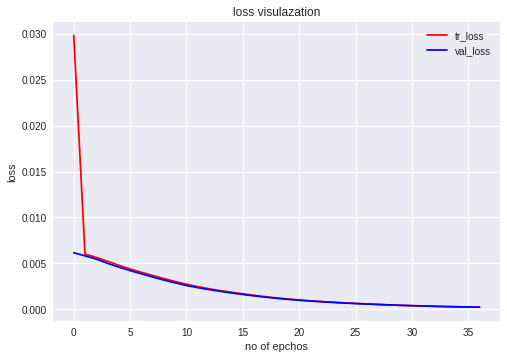

In [0]:
plt.plot(hist.history["loss"],color = 'red', label = 'tr_loss')
plt.plot(hist.history["val_loss"], color = 'blue', label = 'val_loss')
plt.title('loss visulazation')
plt.xlabel('no of epchos')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

In [0]:
def predict_sequence(infenc, infdec, source, n_steps, cardinality):
	# encode
	state = infenc.predict(source)
	# start of sequence input
	target_seq = array([0.0 for _ in range(cardinality)]).reshape(1, 1, cardinality)
	# collect predictions
	output = list()
	for t in range(n_steps):
		# predict next char
		yhat, h, c = infdec.predict([target_seq] + state)
		# store prediction
		output.append(yhat[0,0,:])
		# update state
		state = [h, c]
		# update target sequence
		target_seq = yhat
	return array(output)

In [0]:
n_features=928
n_steps_out=10

In [0]:
prediction=[]
for ix in X[:5]:
  k=np.reshape(ix,(1,350))
  target = predict_sequence(infenc, infdec,k, n_steps_out, n_features)
  ll.append(one_hot_decode(target))

In [0]:
pp=0
fp=0
fn=0

for ix in range(len(y_test)):
  cc=(y_test[ix])
  for ixx in np.unique(prediction[ix]):
    if ixx >0:
      if ixx in cc:
        pp=pp+1
        fg.append(ixx)
      else:
        fp=fp+1
  
  for iix in cc:
    if iix>0:
      if ixx not in fg:
        fn=fn+1
    

In [0]:
precision=pp/(fp+pp)
recall=pp/(pp+fn)
f1_score=2*(precision*recall)/(precision+recall)
print("precision: ",precision)
print("recall:",recall)
print("f1_score",f1_score)